In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = load_wine(as_frame=True)

In [3]:
X = df.data #features
y = df.target #target

In [4]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [6]:
print(np.unique(y))

[0 1 2]


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [8]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
X.isna().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42, stratify=y)

In [11]:
len(X_train)

124

In [12]:
len(X_test)

54

In [13]:
len(y_train)

124

In [14]:
len(y_test)

54

In [15]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
12,13.75,1.73,2.41,16.0,89.0,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320.0
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
31,13.58,1.66,2.36,19.1,106.0,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515.0
120,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
114,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385.0
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0


In [16]:
X_test

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
64,12.17,1.45,2.53,19.0,104.0,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355.0
18,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0
58,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285.0
156,13.84,4.12,2.38,19.5,89.0,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480.0
87,11.65,1.67,2.62,26.0,88.0,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562.0
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0


In [17]:
y_train

,target
12,0
30,0
36,0
31,0
120,1
...,...
168,2
114,1
152,2
136,2


In [18]:
y_test

,target
2,0
64,1
18,0
7,0
38,0
58,0
156,2
87,1
121,1
130,2


In [19]:
#scale data
mms = MinMaxScaler()

X_train_scaled = pd.DataFrame(mms.fit_transform(X_train))
X_test_scaled = pd.DataFrame(mms.transform(X_test))

In [20]:
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.715789,0.195652,0.564516,0.278351,0.206522,0.558621,0.711765,0.32,0.439873,0.368601,0.544715,0.615094,0.842361
1,0.710526,0.150198,0.720430,0.613402,0.336957,0.696552,0.855882,0.32,0.620253,0.377133,0.577236,0.543396,0.814066
2,0.592105,0.177866,0.795699,0.252577,0.434783,0.558621,0.688235,0.42,0.297468,0.283276,0.495935,0.569811,0.486661
3,0.671053,0.181818,0.537634,0.438144,0.391304,0.648276,0.838235,0.18,0.484177,0.479522,0.495935,0.607547,1.000000
4,0.110526,0.328063,0.569892,0.484536,0.282609,0.662069,0.720588,0.38,0.446203,0.168089,0.260163,0.800000,0.280517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.671053,0.363636,0.715054,0.716495,0.380435,0.196552,0.147059,0.52,0.354430,0.629693,0.211382,0.200000,0.381568
120,0.276316,0.128458,0.612903,0.613402,0.152174,0.544828,0.573529,0.60,0.196203,0.138225,0.365854,0.724528,0.086500
121,0.547368,0.229249,0.747312,0.768041,0.500000,0.420690,0.276471,0.26,0.360759,0.496587,0.105691,0.022642,0.118836
122,0.321053,0.786561,0.634409,0.536082,0.206522,0.137931,0.038235,0.80,0.120253,0.219283,0.219512,0.000000,0.357316


In [21]:
X_test_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.560526,0.320158,0.704301,0.412371,0.336957,0.627586,0.852941,0.34,0.756329,0.375427,0.447154,0.716981,0.733226
1,0.300000,0.140316,0.629032,0.432990,0.369565,0.313793,0.414706,0.64,0.193038,0.142491,0.788618,0.362264,0.062247
2,0.831579,0.167984,0.602151,0.304124,0.413043,0.800000,1.055882,0.38,0.455696,0.633106,0.609756,0.584906,1.133387
3,0.797368,0.278656,0.672043,0.360825,0.554348,0.558621,0.638235,0.36,0.262658,0.321672,0.471545,0.871698,0.822150
4,0.536842,0.150198,0.397849,0.252577,0.304348,0.489655,0.676471,0.30,0.300633,0.206485,0.569106,0.535849,0.599838
5,0.707895,0.136364,0.612903,0.314433,0.413043,0.834483,0.979412,0.12,0.512658,0.470990,0.333333,0.603774,0.814066
6,0.739474,0.667984,0.548387,0.458763,0.206522,0.282759,0.144118,0.70,0.360759,0.659556,0.073171,0.139623,0.163298
7,0.163158,0.183794,0.677419,0.793814,0.195652,0.324138,0.373529,0.54,0.291139,0.112628,0.715447,0.732075,0.229588
8,0.139474,0.258893,1.005376,0.922680,0.532609,0.758621,1.394118,0.68,0.458861,0.402730,0.365854,0.913208,0.151172
9,0.481579,0.120553,0.516129,0.381443,0.565217,0.182759,0.267647,0.16,0.164557,0.240614,0.227642,0.007547,0.284559


In [31]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42), #fine tuned some parameters to try different results
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42, C=100),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=50, max_depth=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=2, learning_rate=0.05),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, estimator=DecisionTreeClassifier(max_depth=2))
}

auc_scores = {}

for name, ml in models.items():
    ml.fit(X_train, y_train)
    y_pred_proba = ml.predict_proba(X_test)

    auc_cv_scores = cross_val_score(ml, X_train, y_train, cv=5, scoring='roc_auc_ovr')
    auc_scores[name] = np.mean(auc_cv_scores)
    print(f"{name} - AUC (CV): {auc_scores[name]:.4f}")

#find the model with the highest AUC
best_model_name = max(auc_scores, key=auc_scores.get)
best_model = models[best_model_name]

Decision Tree - AUC (CV): 0.8977
K-Nearest Neighbors - AUC (CV): 0.8537
Naive Bayes - AUC (CV): 0.9982
SVM - AUC (CV): 0.8992
Random Forest - AUC (CV): 0.9981
Gradient Boosting - AUC (CV): 0.9785
AdaBoost - AUC (CV): 0.9940


In [32]:
print(f"Model with the best AUC: {best_model_name}")
print();

y_pred = best_model.predict(X_test_scaled)

#cnfusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#precision, recall
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None, zero_division=0  )

print();
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Support: {support}")

precision_macro = precision.mean()
recall_macro = recall.mean()
f1_macro = f1.mean()

print()
print(f"Macro Average Precision: {precision_macro:.4f}")
print(f"Macro Average Recall: {recall_macro:.4f}")
print(f"Macro Average F1-Score: {f1_macro:.4f}")

#sensitivity
sensitivity = recall_macro

#specificity for each class
specificity = []
for i in range(cm.shape[0]):
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp = np.sum(cm[:, i]) - cm[i, i]

    specificity_class_i = tn / (tn + fp) if (tn + fp) != 0 else 0.0
    specificity.append(specificity_class_i)

print()
print("Specificity for each class:")
print(specificity)

Model with the best AUC: Naive Bayes

Confusion Matrix:
[[ 0 18  0]
 [ 0 21  0]
 [ 0 15  0]]

Precision: [0.         0.38888889 0.        ]
Recall: [0. 1. 0.]
F1-Score: [0.   0.56 0.  ]
Support: [18 21 15]

Macro Average Precision: 0.1296
Macro Average Recall: 0.3333
Macro Average F1-Score: 0.1867

Specificity for each class:
[np.float64(1.0), np.float64(0.0), np.float64(1.0)]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


###Optional

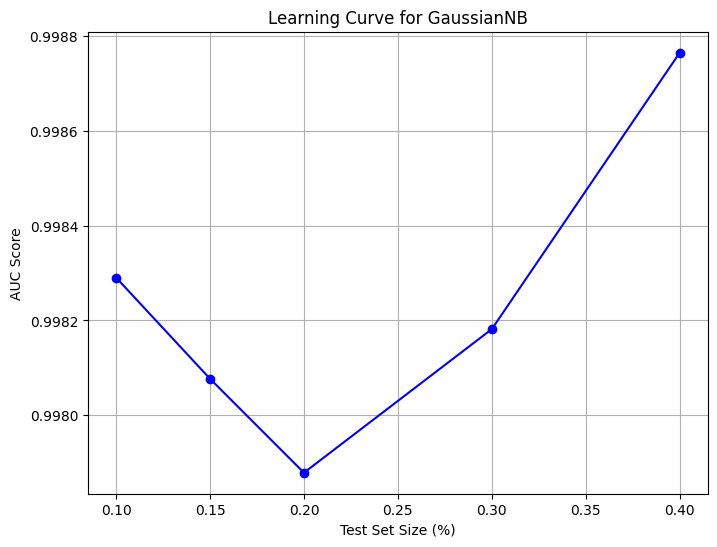

In [33]:
test_sizes = [0.1, 0.15, 0.2, 0.3, 0.4]

auc_scores = []

#iterate through each test size and train the model on that
for test_size in test_sizes:

    X_train_subset, _, y_train_subset, _ = train_test_split(X_train_scaled, y_train, test_size=test_size, random_state=42)

    auc_cv_scores = cross_val_score(best_model, X_train_subset, y_train_subset, cv=5, scoring='roc_auc_ovr')
    auc_scores.append(np.mean(auc_cv_scores))

#plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(test_sizes, auc_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Test Set Size (%)')
plt.ylabel('AUC Score')
plt.title(f'Learning Curve for {best_model.__class__.__name__}')
plt.grid(True)
plt.show()